# Test for get_main_color_without_red_and_floor()

In [1]:
# Add libraries
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageFilter, ImageOps
from openpyxl import load_workbook

In [2]:
# Read image with PIL
from PIL import Image, ImageFilter, ImageOps
def read_pil_image(file1):
    #print('Reading PIL image:', file1)
    try:
        im_pil = Image.open(file1)
    except:
        print("-->Unable to load image",file1)
    return im_pil

In [31]:
# Read image with OPENCV
import cv2
def read_cv2_image(file1):
    #print('Reading CV image:',file1)
    try:
        im_cv = cv2.imread(file1)
    except:
        print("-->Unable to load image",file1)
    return im_cv

In [4]:
#!/usr/bin/python

# Return one 24-bit color value 
def rgbToDecimal(x_rgb):
    r,g,b = rgbToRGB(x_rgb)
    rgb_dec = (r << 16) + (g << 8) + b
    #print('RGB Color:', x_rgb, '   Dec:', rgb_dec)
    return rgb_dec

# Convert 24-bit color value to RGB
def colorToRGB(c):
    r = c >> 16
    c -= r * 65536;
    g = c / 256
    c -= g * 256;
    b = c
    return [r, g, b]

def rgbToRGB(x_rgb):
    x_rgb = list(x_rgb)
    r = x_rgb[0]
    g = x_rgb[1]
    b = x_rgb[2]

    #print('rgbToRGB:',x_rgb, r,g,b)
    return r, g, b

def getRGBfromI(RGBint):
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue

def getIfromRGB(rgb):
    red = rgb[0]
    green = rgb[1]
    blue = rgb[2]
    #print('getIfromRGB:', red, green, blue)
    RGBint = (red<<16) + (green<<8) + blue
    return RGBint

# RGB to Hex Decimal
def rgb_to_hex(rgb):
    rgb_int = bytes(rgb).hex()
    rgb_dec = '#'+str(rgb_int)
    #print('RGB :',rgb, '  Hex Dec:', rgb_dec)
    return rgb_dec


In [5]:
# Get color name from RGB
# https://stackoverflow.com/questions/2453344/find-the-colour-name-from-a-hexadecimal-colour-code

colorof = {'#F0F8FF':"aliceblue",
'#FAEBD7':"antiquewhite",
'#00FFFF':"aqua",
'#7FFFD4':"aquamarine",
'#F0FFFF':"azure",
'#F5F5DC':"beige",
'#FFE4C4':"bisque",
'#000000':"black",
'#FFEBCD':"blanchedalmond",
'#0000FF':"blue",
'#8A2BE2':"blueviolet",
'#A52A2A':"brown",
'#DEB887':"burlywood",
'#5F9EA0':"cadetblue",
'#7FFF00':"chartreuse",
'#D2691E':"chocolate",
'#FF7F50':"coral",
'#6495ED':"cornflowerblue",
'#FFF8DC':"cornsilk",
'#DC143C':"crimson",
'#00FFFF':"cyan",
'#00008B':"darkblue",
'#008B8B':"darkcyan",
'#B8860B':"darkgoldenrod",
'#A9A9A9':"darkgray",
'#006400':"darkgreen",
'#BDB76B':"darkkhaki",
'#8B008B':"darkmagenta",
'#556B2F':"darkolivegreen",
'#FF8C00':"darkorange",
'#9932CC':"darkorchid",
'#8B0000':"darkred",
'#E9967A':"darksalmon",
'#8FBC8B':"darkseagreen",
'#483D8B':"darkslateblue",
'#2F4F4F':"darkslategray",
'#00CED1':"darkturquoise",
'#9400D3':"darkviolet",
'#FF1493':"deeppink",
'#00BFFF':"deepskyblue",
'#696969':"dimgray",
'#1E90FF':"dodgerblue",
'#B22222':"firebrick",
'#FFFAF0':"floralwhite",
'#228B22':"forestgreen",
'#FF00FF':"fuchsia",
'#DCDCDC':"gainsboro",
'#F8F8FF':"ghostwhite",
'#FFD700':"gold",
'#DAA520':"goldenrod",
'#808080':"gray",
'#008000':"green",
'#ADFF2F':"greenyellow",
'#F0FFF0':"honeydew",
'#FF69B4':"hotpink",
'#CD5C5C':"indianred",
'#4B0082':"indigo",
'#FFFFF0':"ivory",
'#F0E68C':"khaki",
'#E6E6FA':"lavender",
'#FFF0F5':"lavenderblush",
'#7CFC00':"lawngreen",
'#FFFACD':"lemonchiffon",
'#ADD8E6':"lightblue",
'#F08080':"lightcoral",
'#E0FFFF':"lightcyan",
'#FAFAD2':"lightgoldenrodyellow",
'#D3D3D3':"lightgray",
'#90EE90':"lightgreen",
'#FFB6C1':"lightpink",
'#FFA07A':"lightsalmon",
'#20B2AA':"lightseagreen",
'#87CEFA':"lightskyblue",
'#778899':"lightslategray",
'#B0C4DE':"lightsteelblue",
'#FFFFE0':"lightyellow",
'#00FF00':"lime",
'#32CD32':"limegreen",
'#FAF0E6':"linen",
'#FF00FF':"magenta",
'#800000':"maroon",
'#66CDAA':"mediumaquamarine",
'#0000CD':"mediumblue",
'#BA55D3':"mediumorchid",
'#9370DB':"mediumpurple",
'#3CB371':"mediumseagreen",
'#7B68EE':"mediumslateblue",
'#00FA9A':"mediumspringgreen",
'#48D1CC':"mediumturquoise",
'#C71585':"mediumvioletred",
'#191970':"midnightblue",
'#F5FFFA':"mintcream",
'#FFE4E1':"mistyrose",
'#FFE4B5':"moccasin",
'#FFDEAD':"navajowhite",
'#000080':"navy",
'#FDF5E6':"oldlace",
'#808000':"olive",
'#6B8E23':"olivedrab",
'#FFA500':"orange",
'#FF4500':"orangered",
'#DA70D6':"orchid",
'#EEE8AA':"palegoldenrod",
'#98FB98':"palegreen",
'#AFEEEE':"paleturquoise",
'#DB7093':"palevioletred",
'#FFEFD5':"papayawhip",
'#FFDAB9':"peachpuff",
'#CD853F':"peru",
'#FFC0CB':"pink",
'#DDA0DD':"plum",
'#B0E0E6':"powderblue",
'#800080':"purple",
'#FF0000':"red",
'#BC8F8F':"rosybrown",
'#4169E1':"royalblue",
'#8B4513':"saddlebrown",
'#FA8072':"salmon",
'#F4A460':"sandybrown",
'#2E8B57':"seagreen",
'#FFF5EE':"seashell",
'#A0522D':"sienna",
'#C0C0C0':"silver",
'#87CEEB':"skyblue",
'#6A5ACD':"slateblue",
'#708090':"slategray",
'#FFFAFA':"snow",
'#00FF7F':"springgreen",
'#4682B4':"steelblue",
'#D2B48C':"tan",
'#008080':"teal",
'#D8BFD8':"thistle",
'#FF6347':"tomato",
'#40E0D0':"turquoise",
'#EE82EE':"violet",
'#F5DEB3':"wheat",
'#FFFFFF':"white",
'#F5F5F5':"whitesmoke",
'#FFFF00':"yellow",
'#9ACD32':"yellowgreen"}


def get_rgb_color_name(rgb):
    
    hex_from_rgb = rgb_to_hex(rgb)  # transform RGB into hexadecimal
    hx = hex_from_rgb[1:8]
    #print(hx)
    # if color is found in dict
    if colorof.get(hx):return colorof[hx]

    # else return its closest available color
    m = 16777215
    k = '000000'
    for key in colorof.keys():
        key_color = key[1:8]
        #print(key_color)
        a = int(hx[:2],16)-int(key_color[:2],16)
        b = int(hx[2:4],16)-int(key_color[2:4],16)
        c = int(hx[4:],16)-int(key_color[4:],16)

        v = a*a+b*b+c*c # simple measure for distance between colors

        # v = (r1 - r2)^2 + (g1 - g2)^2 + (b1 - b2)^2

        if v <= m:
            m = v
            k = key

    return colorof[k], hex_from_rgb

rgb_1 = (216, 220, 223)
cname, hexdc = get_rgb_color_name(rgb_1)
print('Found:',    cname, '  Hex:', hexdc)     # found in dict

Found: gainsboro   Hex: #d8dcdf


# Execution

In [35]:
# Verify my current folder
currDir = os.path.dirname(os.path.realpath("__file__"))
mypath = currDir
print(currDir)  

C:\Users\manuel.robalinho\Google Drive\UPT_Portucalense\Trabalho final\Classificacao_Sucata\Jupyter_Notebook


In [36]:
# Path to the image files
folder = "imagedata01"
# Part name of file to filter files
end_file = ".tif"
path = currDir + "/" + folder + "/"
mypath = currDir + "/"

In [8]:
# https://convertingcolors.com/rgb-color-169_171_170.html

# return most_present RGB, RGB, color name, list RGB colors without RED, list RGB colors without back

import collections

#-----------------

f2_file = 'Copper_001.tif'

print('    Main color from image:', f2_file)
file1 = path + f2_file
    
# Read image
img = read_pil_image(file1)
if img == None:
    print("-->Unable to load image",file1)
        
colors = img.getcolors( 1024*1024) #put a higher value if there are many colors in your image
#-----
# Create list with colors without Background red color (near Background color)
list_non_back = list()
list_dec_back = list()   # List from decimal colors to list_non_back

#
print('...  List without excluded colors')
# Convert list to decimal color
for color in colors:
    # Diference between colors
   # print(color[1])
    rgb = color[1]

    excluded_rgb = False

    #Verify color name
    xt_color_name , hexdc = get_rgb_color_name(rgb)

    # Exclusion for some colors (Red Backgroud, Black foor, etc)
    if "red"   in xt_color_name: 
         excluded_rgb = True
    if "black" in xt_color_name:        
         excluded_rgb = True
    if "white" in xt_color_name:
        excluded_rgb = True
    if "cream" in xt_color_name:
        excluded_rgb = True             

    if  excluded_rgb == True:     # Exclude COLOR  
        #print("Cor excluida", rgb, xt_color_name )
        excluded_rgb = True
    else:
        # OK COLOR - Save color in the list of correct colors (list_non_back)
        #print("Cor OK", rgb, xt_color_name )
        list_non_back.append(rgb)
        # Decimal color
        rgb_dec    = rgbToDecimal(rgb)
        list_dec_back.append(rgb_dec)   

#-----
print('Count ocurrencies for color')
most_present = 0

# Most common color in the list - list_non_back
x = collections.Counter(list_non_back)
print('      4 Most common colors:', x.most_common(4))  # Five most common colors
most_present = x.most_common(1)
xrgb = list_non_back[0] # common color

# ----- color name --
#xt_color_name = get_color_name(xrgb)
print('      Read color name:', xrgb)  # Color name from RGB
xt_color_name , hexdc = get_rgb_color_name(xrgb)
print('      Main Color file:', f2_file, ' RGB:', most_present, xrgb, ' Color name:', xt_color_name,' Hex:',hexdc)
    
#    return most_present, xrgb, xt_color_name, list_non_back, list_dec_back


    Main color from image: Copper_001.tif
...  List without excluded colors
Count ocurrencies for color
      4 Most common colors: [((226, 226, 223), 1), ((225, 225, 223), 1), ((224, 224, 223), 1), ((223, 223, 223), 1)]
      Read color name: (226, 226, 223)
      Main Color file: Copper_001.tif  RGB: [((226, 226, 223), 1)] (226, 226, 223)  Color name: gainsboro  Hex: #e2e2df


# Test Remove Background

   Red background for image: Brass_001.tif
   Save masked image with red background: Mask_Brass_001.tif


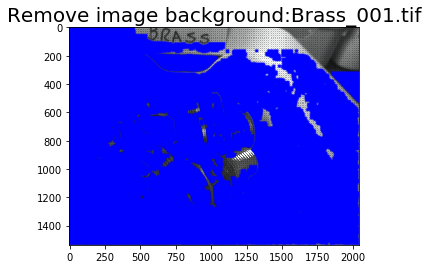

In [37]:
# Remove Background - Put red background
#https://stackoverflow.com/questions/29313667/how-do-i-remove-the-background-from-this-kind-of-image
    
import cv2
import numpy as np

xfile = 'Brass_001.tif'

print('   Red background for image:', xfile)
#== Parameters =======================================================================
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 50
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
MASK_COLOR = (0.0,0.0,1.0) # In BGR format

#== Processing =======================================================================
file1 = path + xfile
#-- Read image -----------------------------------------------------------------------
#img = cv2.imread(file1)
# Read image
img = read_cv2_image(file1)
if img.any() == None:
    print("-->Unable to load image",file1)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#-- Edge detection -------------------------------------------------------------------
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

#-- Find contours in edges, sort by area ---------------------------------------------
contour_info = []
_, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

#-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
# Mask is black, polygon is white
mask = np.zeros(edges.shape)
for c in contour_info:
    cv2.fillConvexPoly(mask, c[0], (255))

#-- Smooth mask, then blur it
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

#-- Blend masked img into MASK_COLOR background
mask_stack  = mask_stack.astype('float32') / 255.0         
img         = img.astype('float32') / 255.0    
masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR)  
masked = (masked * 255).astype('uint8')                    

cv2.imwrite(path+"MASK_"+xfile,masked)

# Create name file masked
f2_file = 'Mask_'+ xfile
file2 = path + f2_file

# Write masked image on disk
print('   Save masked image with red background:', f2_file)
cv2.imwrite(file2, masked)           # Save
# Return name file masked and image masked
  

%matplotlib inline
plt.imshow(masked)
plt.title('Remove image background:'+xfile,fontsize=20)
plt.show()

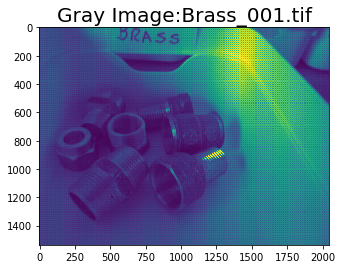

In [18]:
img = cv2.imread(file1)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#---------
%matplotlib inline
plt.imshow(gray_img)
plt.title('Gray Image:'+xfile,fontsize=20)
plt.show()

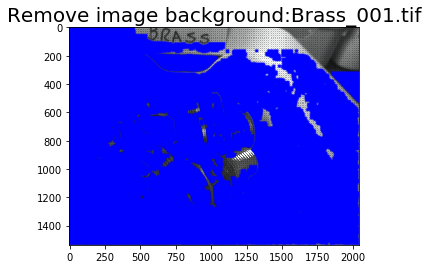

In [21]:
%matplotlib inline
plt.imshow(masked)
plt.title('Remove image background:'+xfile,fontsize=20)
plt.show()

In [46]:
path

'C:\\Users\\manuel.robalinho\\Google Drive\\UPT_Portucalense\\Trabalho final\\Classificacao_Sucata\\Jupyter_Notebook/Test_image02/'

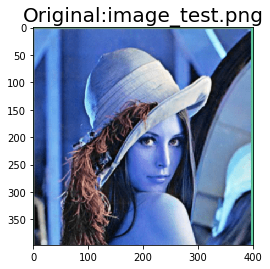

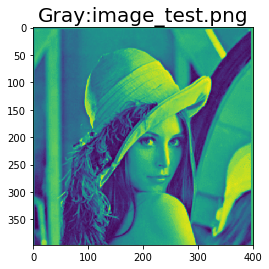

In [34]:
# Example to put COLOR image like Gray
# https://techtutorialsx.com/2018/06/02/python-opencv-converting-an-image-to-gray-scale/
import cv2

xfile = 'image_test.png'
folder = 'Test_image02'
path = mypath + '/' + folder + '/'

image = cv2.imread(path+xfile)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
cv2.imshow('Original image',image)
cv2.imshow('Gray image', gray)
  
cv2.waitKey(0)
cv2.destroyAllWindows()
#---
%matplotlib inline
plt.imshow(image)
plt.title('Original:'+xfile,fontsize=20)
plt.show()
plt.imshow(gray)
plt.title('Gray:'+xfile,fontsize=20)
plt.show()

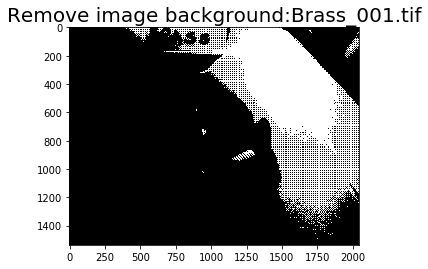

In [27]:
# Gray image using PIL

xfile = 'Brass_001.tif'
file1 = path+xfile
##### Using PIL
from PIL import Image
col = Image.open(file1) #read image
gray = col.convert('L')  #conversion to gray scale
bw = gray.point(lambda x: 0 if x<128 else 255, '1')  #binarization
bw.save("test_bw.png") #save it
#---
%matplotlib inline
plt.imshow(bw)
plt.title('Remove image background:'+xfile,fontsize=20)
plt.show()